In [20]:
from helpers.idf_helpers import *
from helpers.plot_helpers import *
from studies import run_study

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, SelectMultiple
from eppy.modeleditor import IDF
from IPython.display import display

import os

In [21]:
outputs = pd.read_excel('Output Variables.xlsx')

In [22]:
temp = outputs[outputs['Units']=='C']

In [23]:
@interact
def get_output(output = temp['Output Name']):
    return temp[temp['Output Name']==output]

interactive(children=(Dropdown(description='output', options=('Site Outdoor Air Drybulb Temperature', 'Site Ou…

In [24]:
var_list = ['Zone Mean Radiant Temperature',
            'Zone Mean Air Temperature',
            'Zone Operative Temperature',
            'Zone Mean Air Dewpoint Temperature',
            'Zone Outdoor Air Wetbulb Temperature', 
            'Zone Air Temperature',
            'Zone Thermostat Air Temperature',
            'Zone Thermostat Heating Setpoint Temperature',
            'Zone Thermostat Cooling Setpoint Temperature',
      '     Zone Adaptive Comfort Operative Temperature Set Point',
           'Zone Heat Index']

In [25]:
idffile = 'input/SF+CZ5A+USA_IL_Chicago-OHare.Intl.AP.725300+hp+crawlspace+IECC_2018.idf'
iddfile = '/usr/local/EnergyPlus-8-6-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf2 = initialization(idffile, iddfile, epwfile)

In [26]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'SU…

In [29]:
%%bash
cp studies/ReadVarsESO variable_study_CHICAGO/


In [33]:
%%bash
cd variable_study_CHICAGO/
ls

readvars.audit
ReadVarsESO


In [16]:
%%bash
./variable_study/ReadVarsESO

 ReadVarsESO program starting.
 Requested ESO file=eplusout.eso
 does not exist.  ReadVarsESO program terminated.
 ReadVarsESO program terminated.


In [30]:
    data = pd.read_csv('variable_study_CHICAGO/')

FileNotFoundError: [Errno 2] No such file or directory: 'variable_study_CHICAGO/eplusout.csv'

In [19]:
data = eso_to_ts('variable_study_CHICAGO/eplusout.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'variable_study_CHICAGO/eplusout.csv'

In [29]:
winterperiod = ['2000-01-08','2000-01-10']
summerperiod= ['2000-08-08','2000-08-10']

In [30]:
datawinter = data[winterperiod[0]:winterperiod[1]]

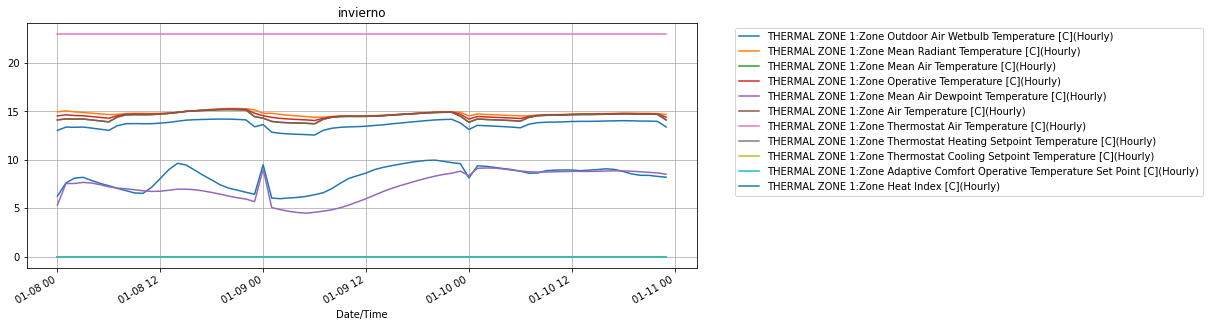

In [31]:
datawinter.plot(title = 'invierno',figsize = (12,5),grid =True).legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))

In [32]:
winter[[]]

NameError: name 'winter' is not defined